In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/탄소중립(59,295건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '뉴스-인기순'))
    return df

news_popular = load_all_data()

## 뉴스-인기순 Sheet

In [4]:
news_popular.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4    14
dtype: int64

In [5]:
news_popular.columns = news_popular.iloc[0]
news_popular.drop(0, inplace=True, axis=0)
news_popular = news_popular.dropna(axis=0, how='any')
news_popular = news_popular[~news_popular['내용'].str.contains('http')]
news_popular = news_popular[news_popular['내용'].str.contains('[가-힣]')]
news_popular = news_popular[news_popular['내용'].str.len() < 1000]

print(news_popular.shape)
news_popular.head()

(12267, 5)


,작성일,작성자,댓글수,제목,내용
5,2022/06/22,SBS,921,"민주당 ""탈원전 바보 같다는 윤 대통령, 전 세계가 바보인가""","더불어민주당은 문재인 정부의 탈원전 정책에 대해 ""바보 같은 짓""이라고 비판한 윤석..."
8,2022/06/29,JTBC,701,"윤 대통령-나토 사무총장 면담 연기...""면담 다시 열릴지는 불투명""",나토 정상회의 참석차 스페인을 순방 중인 윤석열 대통령은 옌스 스톨텐베르그 나토 사...
9,2022/06/22,MBC,559,"민주당 ""탈원전이 바보 같다는 윤석열 대통령, 전 세계가 바보인가""",더불어민주당은 문재인 정부의 탈원전 정책에 대해 '바보 같은 짓'이라고 비판한 윤석...
19,2022/06/22,매일신문,282,"""尹대통령, '文 탈원전이 바보짓'이면 전세계가 바보냐""","조오섭 민주당 대변인 ""전 정부 때리기 도 넘어, 탈원전 아니라 장기적 에너지 전환..."
23,2022/06/22,국민일보,237,尹 “탈원전 바보 같은 짓”에 민주당 “전 세계가 바보인가”,더불어민주당이 문재인 정부의 탈원전 정책을 ‘바보같은 짓’이라는 윤석열 대통령의 발...


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_news_popular = tfdif(news_popular['내용'])

In [8]:
tfidf_news_popular

,10,100,10일,11일,12월,12일,13일,14일,15일,16일,...,활용해,회장,회장은,회장이,효과가,효과를,후보,후보는,후보자는,힘을
0,0.0,0.112174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.102186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.117802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12262,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12263,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.243713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12264,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12265,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import pickle

tfidf_news_popular.to_pickle('tfidf_news_popular.pkl')

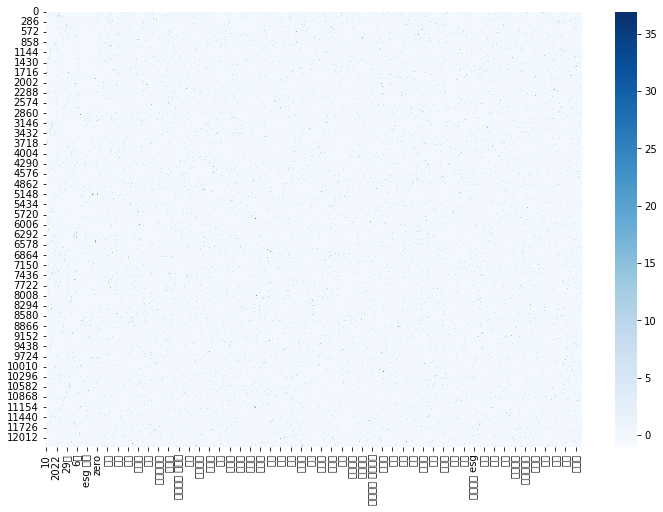

In [10]:
tfidf_news_popular = (tfidf_news_popular - tfidf_news_popular.mean()) / tfidf_news_popular.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_news_popular, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above